In [1]:
from ase import Atoms
from ase.build import bulk
from ase.visualize import view
from gpaw import GPAW, PW
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from ase.io import write
from ase.spacegroup import crystal
from ase.units import kJ
from ase.eos import EquationOfState




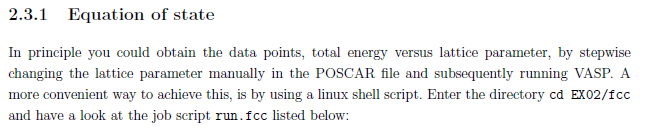

In [2]:
# Define the Birch-Murnaghan equation of state taken from overflow
def birch_murnaghan(V, E0, V0, B0, B0_prime):
    term1 = 9 * V0 * B0 / 16
    term2 = ((V0 / V) ** (2/3) - 1) ** 3 * B0_prime
    term3 = ((V0 / V) ** (2/3) - 1) ** 2 * (6 - 4 * (V0 / V) ** (2/3))
    return E0 + term1 * (term2 + term3)

def calc_al_fcc(a,k=11,E_cut=200):
    b = a / 2

    # Create the primitive cell of FCC Aluminum
    al_fcc = Atoms('Al',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    calc_fcc = GPAW(mode=PW(E_cut),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                xc='PBE') # using GGA
                #txt=f'al_fcc_{a}_{k}.txt')  # output file

    al_fcc.calc = calc_fcc
    e_fcc = al_fcc.get_potential_energy()
    v_fcc = al_fcc.get_volume()

    return v_fcc, e_fcc



### Change the lattice parameter

In [4]:
nr_para = 13
E_tot_fcc = np.zeros(nr_para)
V_fcc = np.zeros(nr_para)
E_tot_bcc = np.zeros(nr_para)
V_bcc = np.zeros(nr_para)

# Define the lattice parameter for FCC Aluminum
for i in range(nr_para):
    a = 3.8+i*0.05  # Angstrom
    b = a / 2

    # Create the primitive cell of FCC Aluminum
    al_fcc = Atoms('Al',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    k = 21 # taken from kpoints file
    calc_fcc = GPAW(mode=PW(200),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                xc='PBE',
                txt=f'al_fcc_{a}.txt')  # output file

    al_fcc.calc = calc_fcc
    e_fcc = al_fcc.get_potential_energy()

    E_tot_fcc[i] = e_fcc
    V_fcc[i] = al_fcc.get_volume()

    print("Lattice parameter a = " + str(a))
    print('The fcc energy is :', e_fcc, 'eV')

    print("\n ########## \n")

# Define the lattice parameter for FCC Aluminum
for i in range(nr_para):
    a = 2.7+i*0.1  # Angstrom
    b = a / 2
    
    al_bcc = Atoms('Al',
            cell=[[-b, b, b],
                [b, -b, b],
                [b, b, -b]],
            pbc=True)
    
    k = 21 # taken from kpoints file
    calc_bcc = GPAW(mode=PW(200),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                xc='PBE',
                txt=f'al_bcc_{a}.txt')  # output file

    al_bcc.calc = calc_bcc
    e_bcc = al_bcc.get_potential_energy()
    E_tot_bcc[i] = e_bcc
    V_bcc[i] = al_bcc.get_volume()

    print("Lattice parameter a = " + str(a))
    print('The bcc energy is :', e_bcc, 'eV')

    print("\n ########## \n")

Lattice parameter a = 3.8
The fcc energy is : -3.5719193526514497 eV

 ########## 

Lattice parameter a = 3.8499999999999996
The fcc energy is : -3.6369588352554727 eV

 ########## 

Lattice parameter a = 3.9
The fcc energy is : -3.6838984988750645 eV

 ########## 

Lattice parameter a = 3.9499999999999997
The fcc energy is : -3.714714732550507 eV

 ########## 

Lattice parameter a = 4.0
The fcc energy is : -3.7313889253611925 eV

 ########## 

Lattice parameter a = 4.05
The fcc energy is : -3.7356187190231114 eV

 ########## 

Lattice parameter a = 4.1
The fcc energy is : -3.728846046539718 eV

 ########## 

Lattice parameter a = 4.1499999999999995
The fcc energy is : -3.7124508683818687 eV

 ########## 

Lattice parameter a = 4.2
The fcc energy is : -3.687845077157778 eV

 ########## 

Lattice parameter a = 4.25
The fcc energy is : -3.6562473355536915 eV

 ########## 

Lattice parameter a = 4.3
The fcc energy is : -3.618733567638057 eV

 ########## 

Lattice parameter a = 4.35
The fc

Side Note: The Atomic Simulation Environment (ASE) includes a built-in function for this purpose. In this case, I manually performed the steps to demonstrate the functions and procedures involved.

Fitted parameters for fcc:
E0 = -3.735419 eV
V0 = 16.514387 Å^3
B0 = 0.484767 GPa
B0_prime = 4.750869


Fitted parameters for fcc:
E0 = -3.633047 eV
V0 = 16.983631 Å^3
B0 = 0.412818 GPa
B0_prime = 4.403605


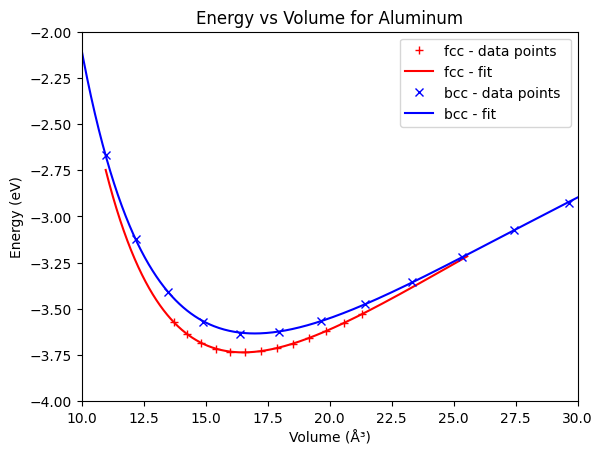

In [5]:
# Initial guess for the parameters
initial_guess = [-3.5, 16.6, 1.0, 4.0]

# Fit the Birch-Murnaghan EOS to the data
p_fcc, cov_fcc = curve_fit(birch_murnaghan, V_fcc, E_tot_fcc, p0=initial_guess)
E0, V0, B0, B0_prime = p_fcc
print(f"Fitted parameters for fcc:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

p_bcc, cov_bcc = curve_fit(birch_murnaghan, V_bcc, E_tot_bcc, p0=initial_guess)
E0, V0, B0, B0_prime = p_bcc
print(f"\n\nFitted parameters for fcc:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

V_fcc_fit= np.linspace(min(V_fcc-V_fcc*0.2), max(V_fcc+V_fcc*0.2), 500)
E_tot_fcc_fit = birch_murnaghan(V_fcc_fit, *p_fcc)
V_bcc_fit= np.linspace(min(V_bcc)-max(V_bcc*0.1), max(V_bcc+V_bcc*0.1), 500)
E_tot_bcc_fit = birch_murnaghan(V_bcc_fit, *p_bcc)

plt.plot(V_fcc, E_tot_fcc,"r+",label="fcc - data points ")
plt.plot(V_fcc_fit, E_tot_fcc_fit, 'r-', label='fcc - fit')
plt.plot(V_bcc, E_tot_bcc,"bx",label="bcc - data points ")
plt.plot(V_bcc_fit, E_tot_bcc_fit, 'b-', label='bcc - fit')
plt.ylim((-4, -2))
plt.xlim((10, 30))
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs Volume for Aluminum')
plt.legend(loc='upper right')
plt.show()

### What k value yields the converged result

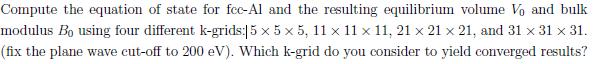

In [6]:

def calc_range_of_a(K,a_min=3.8,a_max=4.4,a_step=0.05):
    V = []
    E =[]

    for k in K:
        lattice = np.arange(a_min, a_max, a_step)
        for a in lattice:
            v,e = calc_al_fcc(a,k)
            V.append(v)
            E.append(e)


    return E,V,lattice


K = [5,11,21,31]

E,V,lattice = calc_range_of_a(K)



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.1.0
 |___|_|             

User:   sebobo@main2021
Date:   Thu Aug  8 08:14:42 2024
Arch:   x86_64
Pid:    2667
CWD:    /home/sebobo/simulations/vasp_exercise_2024/GPAW/EX02
Python: 3.8.10
gpaw:   /home/sebobo/.local/lib/python3.8/site-packages/gpaw
_gpaw:  /home/sebobo/.local/lib/python3.8/site-packages/
        _gpaw.cpython-38-x86_64-linux-gnu.so
ase:    /home/sebobo/.local/lib/python3.8/site-packages/ase (version 3.23.0)
numpy:  /home/sebobo/.local/lib/python3.8/site-packages/numpy (version 1.24.4)
scipy:  /home/sebobo/.local/lib/python3.8/site-packages/scipy (version 1.10.1)
libxc:  4.3.4
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {energy: 1e-08}
  kpts: {size: (5, 5, 5)}
  mode: {ecut: 200.0,
         name: pw}
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
  Al:


Fitted parameters for k = 5:
E0 = -3.679241 eV
V0 = 16.922579 Å^3
B0 = 0.478473 GPa
B0_prime = 3.603168
Fitted parameters for k = 11:
E0 = -3.742018 eV
V0 = 16.523345 Å^3
B0 = 0.488594 GPa
B0_prime = 4.737663
Fitted parameters for k = 21:
E0 = -3.735419 eV
V0 = 16.514387 Å^3
B0 = 0.484767 GPa
B0_prime = 4.750869
Fitted parameters for k = 31:
E0 = -3.734159 eV
V0 = 16.508623 Å^3
B0 = 0.484021 GPa
B0_prime = 4.768248


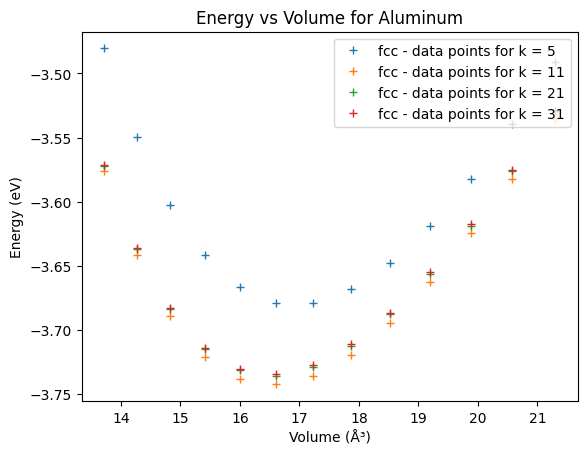

In [40]:
# Initial guess for the parameters
initial_guess = [-3.5, 16.6, 1.0, 4.0]

nr_lattice_para = len(lattice)

for k_iter in range(len(K)):
    V_curr = V[k_iter*nr_lattice_para:(k_iter+1)*nr_lattice_para]
    E_curr = E[k_iter*nr_lattice_para:(k_iter+1)*nr_lattice_para]
    p_fcc, cov_fcc = curve_fit(birch_murnaghan, V_curr, E_curr, p0=initial_guess)
    E0, V0, B0, B0_prime = p_fcc
    print(f"Fitted parameters for k = {K[k_iter]}:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

    plt.plot(V_curr, E_curr,"+",label=f"fcc - data points for k = {K[k_iter]}")
#plt.ylim((-4, -3.25))
#plt.xlim((10, 30))
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs Volume for Aluminum')
plt.legend(loc='upper right')
plt.show()

### How does the cutoff energy influence the result

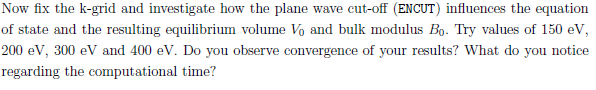

In [48]:
def calc_range_of_E_cut(a_min=3.9,a_max=4.3,a_step=0.05):
    V = []
    E =[]

    E_cut = [150,200,300,400]
    lattice = np.arange(a_min, a_max, a_step)
    for e_cut in E_cut:
        for a in lattice:
            v,e = calc_al_fcc(a,E_cut=e_cut)
            V.append(v)
            E.append(e)
    return E,V,lattice

E,V,lattice = calc_range_of_E_cut()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.1.0
 |___|_|             

User:   sebobo@main2021
Date:   Thu Jun 13 12:06:12 2024
Arch:   x86_64
Pid:    2902
CWD:    /home/sebobo/simulations/vasp_exercise_2024/GPAW/EX02
Python: 3.8.10
gpaw:   /home/sebobo/.local/lib/python3.8/site-packages/gpaw
_gpaw:  /home/sebobo/.local/lib/python3.8/site-packages/
        _gpaw.cpython-38-x86_64-linux-gnu.so
ase:    /home/sebobo/.local/lib/python3.8/site-packages/ase (version 3.23.0)
numpy:  /home/sebobo/.local/lib/python3.8/site-packages/numpy (version 1.24.4)
scipy:  /home/sebobo/.local/lib/python3.8/site-packages/scipy (version 1.10.1)
libxc:  4.3.4
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {energy: 1e-08}
  kpts: {size: (11, 11, 11)}
  mode: {ecut: 150.0,
         name: pw}
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
  A

Fitted parameters for E_cut = 150:
E0 = -3.737837 eV
V0 = 16.557289 Å^3
B0 = 0.496209 GPa
B0_prime = 4.458538
Fitted parameters for E_cut = 200:
E0 = -3.742386 eV
V0 = 16.531358 Å^3
B0 = 0.494253 GPa
B0_prime = 4.628523
Fitted parameters for E_cut = 300:
E0 = -3.745106 eV
V0 = 16.535960 Å^3
B0 = 0.492384 GPa
B0_prime = 4.642359
Fitted parameters for E_cut = 400:
E0 = -3.745890 eV
V0 = 16.536542 Å^3
B0 = 0.492253 GPa
B0_prime = 4.625055


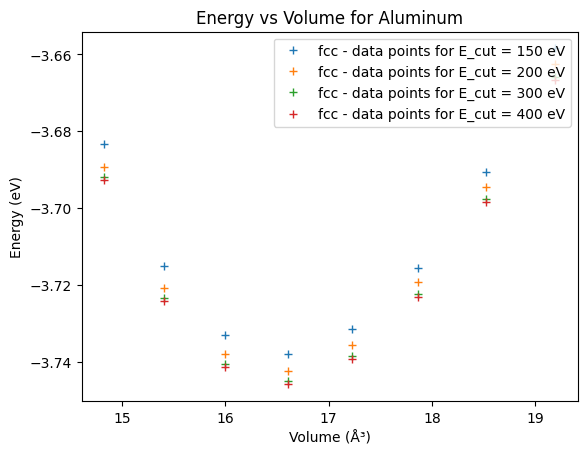

In [49]:
# Initial guess for the parameters
initial_guess = [-3.5, 16.6, 1.0, 4.0]
E_cut = [150,200,300,400]

nr_lattice_para = len(lattice)
nr_cutoff_para = len(E_cut)

for cut_iter in range(nr_cutoff_para):
    V_curr = V[cut_iter*nr_lattice_para:(cut_iter+1)*nr_lattice_para]
    E_curr = E[cut_iter*nr_lattice_para:(cut_iter+1)*nr_lattice_para]
    p_fcc, cov_fcc = curve_fit(birch_murnaghan, V_curr, E_curr, p0=initial_guess)
    E0, V0, B0, B0_prime = p_fcc
    print(f"Fitted parameters for E_cut = {E_cut[cut_iter]}:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

    plt.plot(V_curr, E_curr,"+",label=f"fcc - data points for E_cut = {E_cut[cut_iter]} eV")
#plt.ylim((-4, -3.25))
#plt.xlim((10, 30))
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs Volume for Aluminum')
plt.legend(loc='upper right')
plt.show()


In [4]:
# Regarding CPU time:

import time

a_min=3.9
a_max=4.3
a_step=0.05
E_cut = [150,200,300,400]
start = []
end = []
iteration_time = []
lattice = np.arange(a_min, a_max, a_step)

for e_cut in E_cut:
    start_time = time.time()
    start.append(start_time)
    for a in lattice:
        v,e = calc_al_fcc(a,E_cut=e_cut)
    end_time = time.time()
    end.append(end_time)
    iteration_time.append(end_time - start_time)



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.1.0
 |___|_|             

User:   sebobo@main2021
Date:   Thu Jun 13 12:27:51 2024
Arch:   x86_64
Pid:    776150
CWD:    /home/sebobo/simulations/vasp_exercise_2024/GPAW/EX02
Python: 3.8.10
gpaw:   /home/sebobo/.local/lib/python3.8/site-packages/gpaw
_gpaw:  /home/sebobo/.local/lib/python3.8/site-packages/
        _gpaw.cpython-38-x86_64-linux-gnu.so
ase:    /home/sebobo/.local/lib/python3.8/site-packages/ase (version 3.23.0)
numpy:  /home/sebobo/.local/lib/python3.8/site-packages/numpy (version 1.24.4)
scipy:  /home/sebobo/.local/lib/python3.8/site-packages/scipy (version 1.10.1)
libxc:  4.3.4
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {energy: 1e-08}
  kpts: {size: (11, 11, 11)}
  mode: {ecut: 150.0,
         name: pw}
  xc: PBE

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
 

I thought it would take longer and longer, but I'm not entirely certain about the exact reason behind each duration.

In [8]:

for e_iter in range(len(E_cut)):
    print(f"\nFor cutoff energy of {E_cut[e_iter]} eV the time was " + str(round(iteration_time[e_iter],2)) + " sec")


For cutoff energy of 150 eV the time was 23.24 sec

For cutoff energy of 200 eV the time was 20.0 sec

For cutoff energy of 300 eV the time was 24.46 sec

For cutoff energy of 400 eV the time was 26.04 sec


### Using LDA for computation

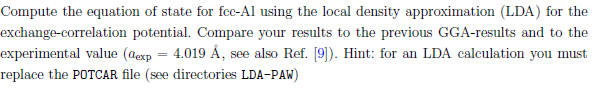

In [9]:

def calc_al_fcc_LDA(a,k=11,E_cut=200):
    b = a / 2

    # Create the primitive cell of FCC Aluminum
    al_fcc = Atoms('Al',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    calc_fcc = GPAW(mode=PW(E_cut),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                xc='LDA') 
                #txt=f'al_fcc_{a}_{k}.txt')  # output file

    al_fcc.calc = calc_fcc
    e_fcc = al_fcc.get_potential_energy()
    v_fcc = al_fcc.get_volume()

    return v_fcc, e_fcc

In [11]:
def calc_with_LDA(a_min=3.8,a_max=4.4,a_step=0.05):
    V = []
    E =[]

    lattice = np.arange(a_min, a_max, a_step)

    for a in lattice:
        v,e = calc_al_fcc_LDA(a)
        V.append(v)
        E.append(e)
    return E,V,lattice

def calc_with_GGA(a_min=3.8,a_max=4.4,a_step=0.05):
    V = []
    E =[]

    lattice = np.arange(a_min, a_max, a_step)

    for a in lattice:
        v,e = calc_al_fcc(a)
        V.append(v)
        E.append(e)
    return E,V,lattice

E_LDA,V_LDA,lattice_LDA = calc_with_LDA()
E_GGA,V_GGA,lattice_GGA = calc_with_GGA()


a_exp = 4.019
v_exp,e_exp = calc_al_fcc(a_exp)


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.1.0
 |___|_|             

User:   sebobo@main2021
Date:   Thu Jun 13 12:36:37 2024
Arch:   x86_64
Pid:    776150
CWD:    /home/sebobo/simulations/vasp_exercise_2024/GPAW/EX02
Python: 3.8.10
gpaw:   /home/sebobo/.local/lib/python3.8/site-packages/gpaw
_gpaw:  /home/sebobo/.local/lib/python3.8/site-packages/
        _gpaw.cpython-38-x86_64-linux-gnu.so
ase:    /home/sebobo/.local/lib/python3.8/site-packages/ase (version 3.23.0)
numpy:  /home/sebobo/.local/lib/python3.8/site-packages/numpy (version 1.24.4)
scipy:  /home/sebobo/.local/lib/python3.8/site-packages/scipy (version 1.10.1)
libxc:  4.3.4
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {energy: 1e-08}
  kpts: {size: (11, 11, 11)}
  mode: {ecut: 200.0,
         name: pw}

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
  Al:
    n

Fitted parameters for LDA:
E0 = -4.183711 eV
V0 = 15.840288 Å^3
B0 = 0.532490 GPa
B0_prime = 4.861514
Fitted parameters for GGA:
E0 = -3.742018 eV
V0 = 16.523345 Å^3
B0 = 0.488594 GPa
B0_prime = 4.737663


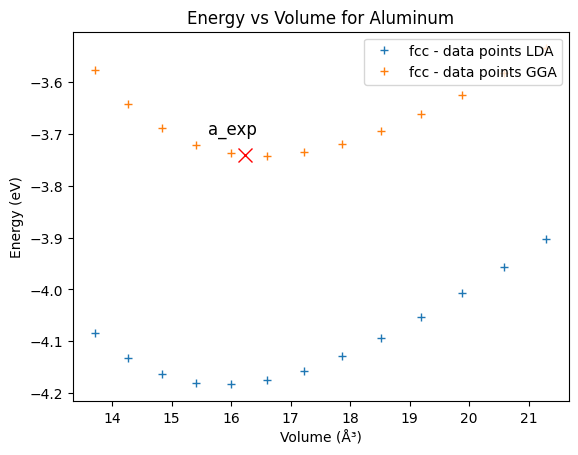

In [32]:
# Initial guess for the parameters
initial_guess = [-3.5, 16.6, 1.0, 4.0]

p_LDA, cov_LDA = curve_fit(birch_murnaghan, V_LDA, E_LDA, p0=initial_guess)
E0, V0, B0, B0_prime = p_LDA
print(f"Fitted parameters for LDA:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

p_GGA, cov_GGA = curve_fit(birch_murnaghan, V_GGA, E_GGA, p0=initial_guess)
E0, V0, B0, B0_prime = p_GGA
print(f"Fitted parameters for GGA:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

plt.plot(V_LDA, E_LDA,"+",label=f"fcc - data points LDA")
plt.plot(V_GGA, E_GGA,"+",label=f"fcc - data points GGA")

plt.plot(v_exp,e_exp, 'rx',ms=10)

plt.text(v_exp+0.2, e_exp+0.05, 'a_exp', rotation=0, verticalalignment='center', horizontalalignment='right', color='black', fontsize=12)


#plt.ylim((-4, -3.25))
#plt.xlim((10, 30))
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs Volume for Aluminum')
plt.legend(loc='upper right')
plt.show()

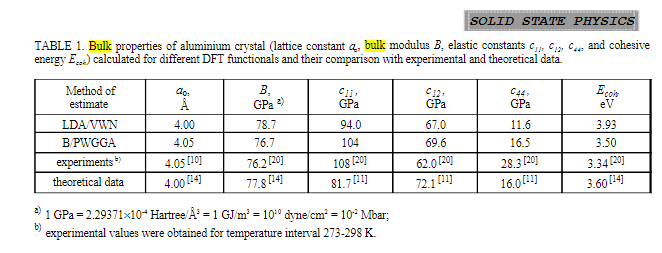

[https://www.researchgate.net/publication/281494058_Bulk_and_surface_properties_of_metallic_aluminium_DFT_simulations]

# hcp vs bcc for aluminium

es wird nun eine andere Variante verwendet.

### EquationOfState
AES bietet ein eingebaute Funktion um die equation of state zu berechnen 
eos = EquationOfState(volumes, energies)


### calculate_eos
eine selbst gebaute funktion bei dem das Objekt Atoms so weit manipuliert wird dass die position relativ geändert wird mit einem saling faktor

The Atoms object holds a unit cell. The unit cell is a Cell object which resembles a 3x3 matrix when used with numpy, arithmetic operations.

The cell can be defined or changed using the set_cell() method. Changing the unit cell does per default not move the atoms. However if we set scale_atoms=True the atomic positions are scaled with the unit cell.

e.g.
atoms.set_cell(np.identity(3), scale_atoms=True)
atoms.get_positions()
array([[ 1. ,  0. ,  0. ],
       [ 0.5,  0.5,  0. ],
       [ 1. ,  1. ,  0. ]])

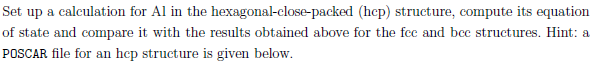

Plot for hcp


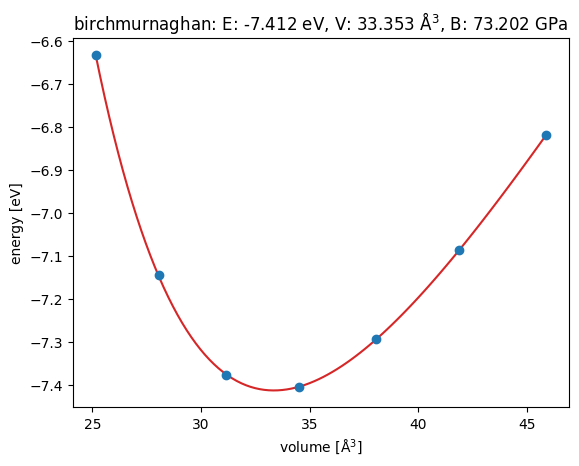

Plot for bcc


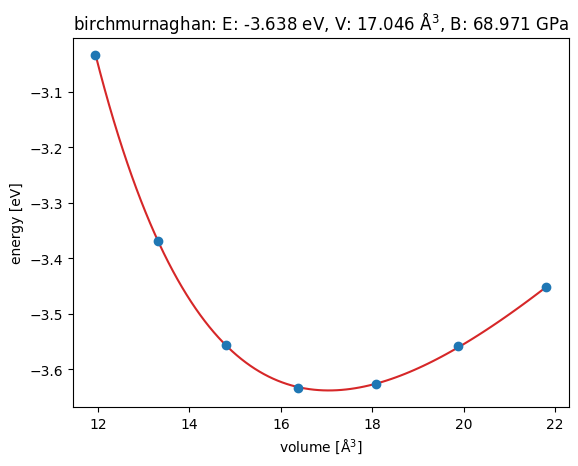

HCP: V0 = 33.35308077973606 Å^3, E0 = -7.412183495151947 eV, B = 73.20226203607695 GPa
BCC: V0 = 17.045739046667673 Å^3, E0 = -3.6380981218085195 eV, B = 68.97096993844987 GPa


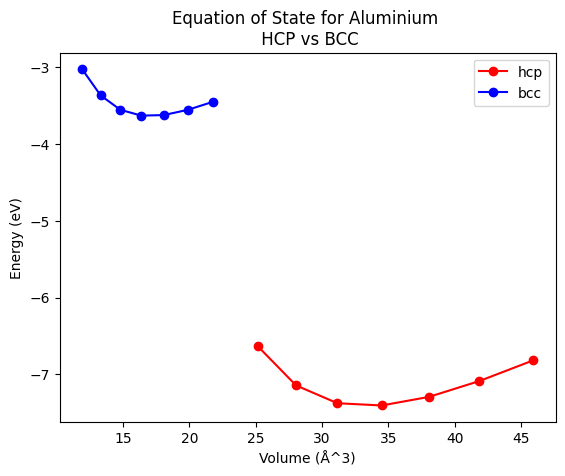

In [26]:
# Define a function to calculate the EOS
def calculate_eos(structure, element='Al', npoints=7):
    # npoints is number of lattice manipulations
    # lat_param = a
    # structure, string to create bulk atom according to ase.build.bulk
    #     element => Chemical symbol or symbols as in ‘MgO’ or ‘NaCl’.
    #     structuce => Must be one of sc, fcc, bcc, tetragonal, bct, hcp, rhombohedral,...
    #     additionally, cubic = True, Cosntruct cubic unit cell if possible
    #     for hcp, default ideal ratio is sqrt(8/3) the same as in the file from PDF

    if structure   == "bcc":
        lat_param = 3.2
    elif structure == "hcp":
        lat_param = 2.9
        # c = default = sqrt (8/3)
    elif structure == "fcc":
        lat_param = 4.05
    else:
        lat_param = 4

    a0 = lat_param
    energies = []
    volumes = []
    for scale in np.linspace(0.9, 1.1, npoints):
        cell = bulk(element, structure, a=a0*scale)
        calc = GPAW(mode=PW(300), xc='PBE', kpts=(8, 8, 8), txt=f'save/{element}_{structure}_EOS.txt')
        cell.calc = calc
        energy = cell.get_potential_energy()
        energies.append(energy)
        volumes.append(cell.get_volume())  
    
    eos = EquationOfState(volumes, energies,eos='birchmurnaghan')
    eos_fit = eos.fit()
    print(f'Plot for {structure}')
    eos.plot(f'pics/{element}_{structure}_EOS.png')
    plt.show()
    return volumes,energies, eos_fit

volumes_hcp,energies_hcp, eos_fit_hcp = calculate_eos('hcp')
volumes_bcc,energies_bcc, eos_fit_bcc = calculate_eos('bcc')

# Print results
print(f"HCP: V0 = {eos_fit_hcp[0]:.2f} Å^3, E0 = {eos_fit_hcp[1]:.2f} eV, B = {eos_fit_hcp[2] / kJ * 1.0e24:.2f} GPa")
print(f"BCC: V0 = {eos_fit_bcc[0]:.2f} Å^3, E0 = {eos_fit_bcc[1]:.2f} eV, B = {eos_fit_bcc[2] / kJ * 1.0e24:.2f} GPa")


plt.figure()
plt.plot(volumes_hcp, energies_hcp, 'ro-', label='hcp')
plt.plot(volumes_bcc, energies_bcc, 'bo-', label='bcc')
plt.xlabel('Volume (Å^3)')
plt.ylabel('Energy (eV)')
plt.legend()
plt.title('Equation of State for Aluminium \n HCP vs BCC')
plt.savefig('pics/Al_EOS_comparison.png')
plt.show()

### Equation of state for another element [Cu]

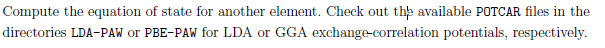

In [12]:
def calc_cu_fcc_LDA(a=3.6,k=11,E_cut=200):
    b = a / 2

    # Create the primitive cell of FCC Aluminum
    cu_fcc = Atoms('Cu',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    calc_fcc = GPAW(mode=PW(E_cut),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                xc='LDA') # using LDA

    cu_fcc.calc = calc_fcc
    e_fcc = cu_fcc.get_potential_energy()
    v_fcc = cu_fcc.get_volume()

    return v_fcc, e_fcc

def calc_cu_fcc_GGA(a=3.6,k=11,E_cut=200):
    b = a / 2

    # Create the primitive cell of FCC Aluminum
    cu_fcc = Atoms('Cu',
                cell=[[0, b, b],
                    [b, 0, b],
                    [b, b, 0]],
                pbc=True)
    
    calc_fcc = GPAW(mode=PW(E_cut),       # cutoff
                convergence={'energy': 1e-8},
                kpts={'size': (k,k,k)} ,     # k-points
                xc='PBE') # using GGA

    cu_fcc.calc = calc_fcc
    e_fcc = cu_fcc.get_potential_energy()
    v_fcc = cu_fcc.get_volume()

    return v_fcc, e_fcc

In [13]:
def calc_cu_with_LDA(a_min=3.2,a_max=3.8,a_step=0.05):
    V = []
    E =[]

    lattice = np.arange(a_min, a_max, a_step)

    for a in lattice:
        v,e = calc_cu_fcc_LDA(a)
        V.append(v)
        E.append(e)
    return E,V,lattice

def calc_cu_with_GGA(a_min=3.2,a_max=3.8,a_step=0.05):
    V = []
    E =[]

    lattice = np.arange(a_min, a_max, a_step)

    for a in lattice:
        v,e = calc_cu_fcc_GGA(a)
        V.append(v)
        E.append(e)
    return E,V,lattice

E_LDA,V_LDA,lattice_LDA = calc_cu_with_LDA()
E_GGA,V_GGA,lattice_GGA = calc_cu_with_GGA()



  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  24.1.0
 |___|_|             

User:   sebobo@main2021
Date:   Thu Jun 13 15:23:04 2024
Arch:   x86_64
Pid:    783989
CWD:    /home/sebobo/simulations/vasp_exercise_2024/GPAW/EX02
Python: 3.8.10
gpaw:   /home/sebobo/.local/lib/python3.8/site-packages/gpaw
_gpaw:  /home/sebobo/.local/lib/python3.8/site-packages/
        _gpaw.cpython-38-x86_64-linux-gnu.so
ase:    /home/sebobo/.local/lib/python3.8/site-packages/ase (version 3.23.0)
numpy:  /home/sebobo/.local/lib/python3.8/site-packages/numpy (version 1.24.4)
scipy:  /home/sebobo/.local/lib/python3.8/site-packages/scipy (version 1.10.1)
libxc:  4.3.4
units:  Angstrom and eV
cores: 1
OpenMP: False
OMP_NUM_THREADS: 1

Input parameters:
  convergence: {energy: 1e-08}
  kpts: {size: (11, 11, 11)}
  mode: {ecut: 200.0,
         name: pw}

System changes: positions, numbers, cell, pbc, initial_charges, initial_magmoms 

Initialize ...

species:
  Cu:
    n

Fitted parameters for LDA:
E0 = -2.262341 eV
V0 = 10.607002 Å^3
B0 = 1.295031 GPa
B0_prime = 8.384173
Fitted parameters for GGA:
E0 = -1.066078 eV
V0 = 17.652702 Å^3
B0 = -0.214123 GPa
B0_prime = -0.620697


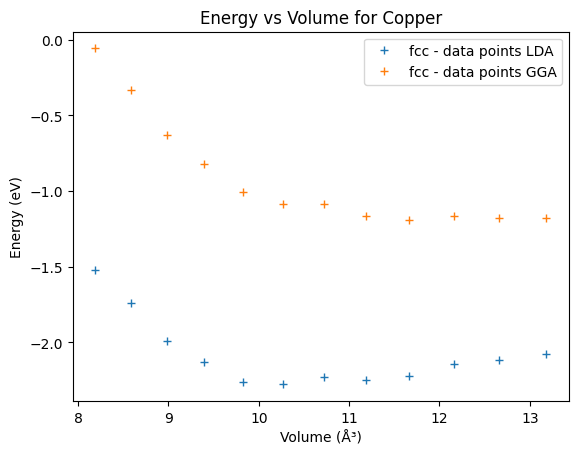

In [18]:
# Initial guess for the parameters
initial_guess = [-3.5, 16.6, 1.0, 4.0]

p_LDA, cov_LDA = curve_fit(birch_murnaghan, V_LDA, E_LDA, p0=initial_guess)
E0, V0, B0, B0_prime = p_LDA
print(f"Fitted parameters for LDA:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

p_GGA, cov_GGA = curve_fit(birch_murnaghan, V_GGA, E_GGA, p0=initial_guess)
E0, V0, B0, B0_prime = p_GGA
print(f"Fitted parameters for GGA:\nE0 = {E0:.6f} eV\nV0 = {V0:.6f} Å^3\nB0 = {B0:.6f} GPa\nB0_prime = {B0_prime:.6f}")

plt.plot(V_LDA, E_LDA,"+",label=f"fcc - data points LDA")
plt.plot(V_GGA, E_GGA,"+",label=f"fcc - data points GGA")

#plt.ylim((-4, -3.25))
#plt.xlim((10, 30))
plt.xlabel('Volume (Å³)')
plt.ylabel('Energy (eV)')
plt.title('Energy vs Volume for Copper')
plt.legend(loc='upper right')
plt.show()